## 데이터셋 불러오기
* pandas 라이브를 이용해서 데이터셋 불러오기

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

## 실습

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42)

사이킷런의 변환기
* 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공
* 변환기 클래스는 fit(), transform()을 제공
PolynomialFeatures
* 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가함

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


PolynomialFeatures
* 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수임  
* 하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 특성을 만들 필요 없음
* 하지만 include_bias 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시함
* 여기에서는 혼돈을 피하기 위해 명시적으로 지정

In [8]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [16]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [17]:
# 9개의 특성이 어떻게 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [18]:
test_poly = poly.transform(test_input)

In [19]:
## 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [26]:
train_score = lr.score(train_poly, train_target)
test_score = lr.score(test_poly, test_target)
print(f'train score : {train_score}\ntest score : {test_score}')

train score : 0.9903183436982125
test score : 0.9714559911594168


observation:  
* 이전보다 test score가 오르지는 않았지만, 농어 길이만 사용했을 때 있던 과소적합 문제는 해결 됨

In [28]:
## 5제곱까지 특성 만들기
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [34]:
lr.fit(train_poly, train_target)
print('train score:', lr.score(train_poly, train_target))
print('test score:', lr.score(test_poly, test_target))

train score: 0.9999999999989608
test score: -144.4049046409093


observation:  
* train에서는 완벽한 점수가 나왔지만, test에서 너무 낮은 숫자가 나옴
* 특성의 개수를 크게 늘리면 선형 모델은 아주 강력해짐(훈련 세트에 대해 거의 완벽하게 학습)

solution:
* 다시 특성을 줄여야 함
* 규제를 사용
    * 특성에 곱해지는 계수의 크기를 작게 만듬
    * 규제에는 릿지(ridge)와 라쏘(lasso) 두 가지가 있음
    * 릿지는 계수를 제곱한 값을 기준으로 규제를 적용함
    * 라쏘는 계수의 절댓값을 기준으로 규제를 적용함
    * 일반적으로 릿지를 조금 더 선호, 라쏘는 아예 0으로 만들 수 있음

## 릿지(ridge)

In [36]:
## 특성의 스케일이 다르므로 정규화 사용
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [40]:
print(ridge.score(test_scaled, test_target))

0.9790693977615388


observation:
* 테스트 점수가 정상으로 돌아옴
* 많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있음

In [43]:
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

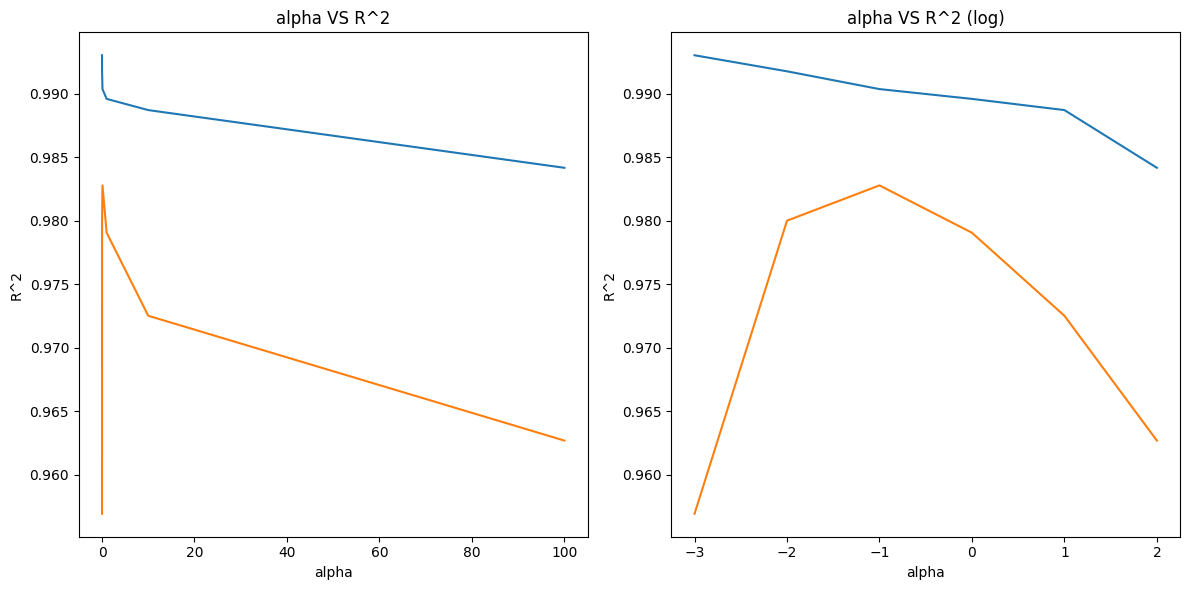

In [69]:
# alpha값을 0.001부터 10배씩 늘려서 왼쪽이 매우 촘촘하게 그려짐 동일한 간격을 나타내기 위해 로그 함수로 변경
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('alpha VS R^2')

plt.subplot(1, 2, 2)
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('alpha VS R^2 (log)')

plt.tight_layout()
plt.show()

observation:
* 왼쪽에서는 과대적합, 오른쪽에서는 과소 적합을 볼 수 있음
* 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트의 점수가 가장 높은 -1 즉 10^-1 = 0.1임
* alpha의 값을 0.1로 최종 모델로 학습

In [72]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print('train score:', ridge.score(train_scaled, train_target))
print('test score:', ridge.score(test_scaled, test_target))

train score: 0.9903815817570366
test score: 0.9827976465386955


## 라쏘(lasso)

In [76]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print('train score:', lasso.score(train_scaled, train_target))
print('test score:', lasso.score(test_scaled, test_target))

train score: 0.989789897208096
test score: 0.9800593698421884


In [87]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/kds/anaconda3/envs/kds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/kds/anaconda3/envs/kds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


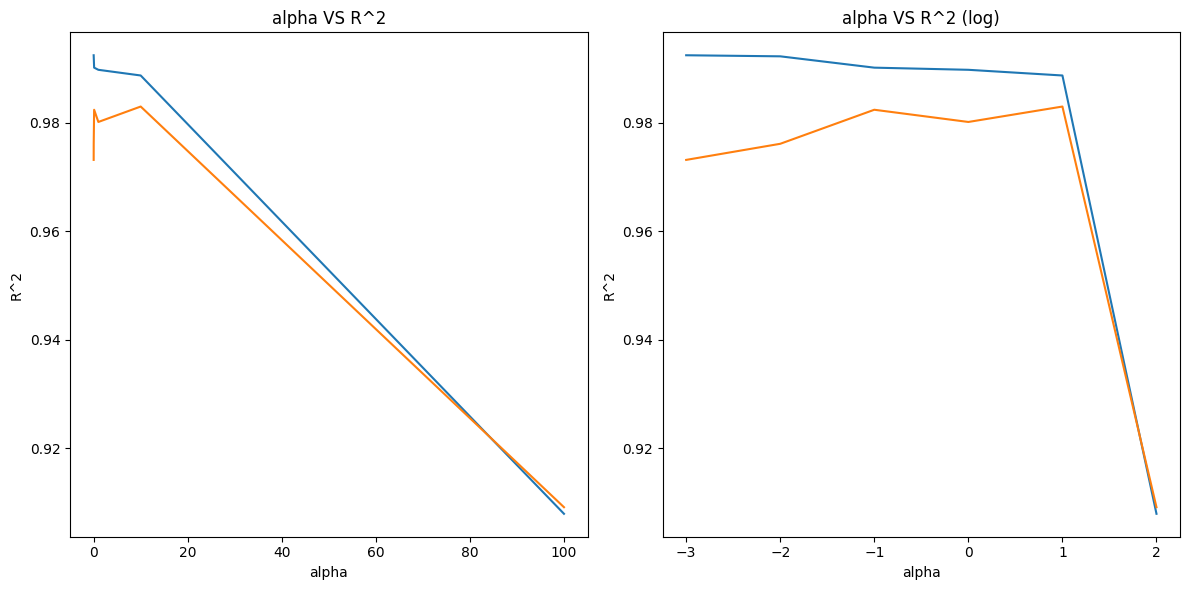

In [88]:
# alpha값을 0.001부터 10배씩 늘려서 왼쪽이 매우 촘촘하게 그려짐 동일한 간격을 나타내기 위해 로그 함수로 변경
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('alpha VS R^2')

plt.subplot(1, 2, 2)
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('alpha VS R^2 (log)')

plt.tight_layout()
plt.show()

In [94]:
# 라쏘 모델에서 최적의 alpha 값은 1 즉 10^1 10임
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print('train_score:', lasso.score(train_scaled, train_target))
print('test_score:', lasso.score(test_scaled, test_target))

train_score: 0.9888067471131867
test_score: 0.9824470598706695


In [95]:
## lasso의 계수 값 확인
print(np.sum(lasso.coef_ == 0))

40


observation:
* 많은 계수가 0이 됨
* 55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개밖에 되지 않음
* 이런 특징 떄문에 라쏘 모델을 유용한 특성을 골라내는 용도로 사용 가능

## 마무리
### 키워드
* 다중회귀 : 여러개의 특성을 사용하는 회귀 모델
    * 특성이 많으면 선형 모델은 강력한 성능을 발휘함
* 특성공학 : 주어진 특성을 조합하여 새로운 특성을 만드는 일련의 작업 과정
* 릿지 : 규제가 있는 선형 회귀 모델중 하나이며 선형 모델의 계수를 작게 만들어 과대적합을 완화시킴
    * 릿지는 비교적 효과가 좋아 널리 사용하는 규제 방법
* 라쏘 : 또 다른 규제가 있는 선형 회귀 모델
    * 릿지와 달리 계수 값을 아예 0으로 만들 수 있음
* 하이퍼파라미터 : 머신러닝 알고리즘이 학습하지 않는 파라미터
    * 사람이 사전에 지정해야 함, 대표적으로 릿지와 라쏘의 규제 강도 alpha 파라미터
### 핵심 패키지와 함수
#### pandas
* read_csv()는 CSV 파일을 로컬 컴퓨터나 인터넷에서 읽어 판다스 데이터 프레임으로 변환하는 함수
* 이 함수는 많은 매개변수를 제공
    * sep는 CSV파일의 구분자를 지정함, 기본값은 '콤마(,)
    * header에 데이터프레임의 열 이름으로 사용할 CSV 파일의 행 번호를 지정함 기본적으로 첫 번째 행을 열 이름으로 사용
    * skiprows는 파일에서 읽지 전에 건너뛸 행의 개수를 지정
    * nrows는 파일에서 읽을 행의 개수를 지정
### scikit-learn
#### PolynimoalFeatures
* 주어진 특성을 조합하여 새로운 특성을 만듬
* degree는 최고 차수를 지정 (default = 2)
* interaction_only가 True이면 거듭제곱 항은 제외되고 특성 간의 곱셈 항만 추가 (default = False)
* include_bias가 False이면 절편을 위한 특성을 추가하지 않음 (default = True)
#### Ridge
* 규제가 있는 회귀 알고리즘인 릿지 회귀모델을 훈련
* alpha 매개변수는 규제의 강도를 조절함
    * 값이 클수록 규제가 세짐 (default = 1)
* solver 매개변수에 최적의 모델을 찾기 위한 방법을 지정할 수 있음 (default = 'auto')로 데이터에 따라 자동으로 선택
* 사이킷런 0.17 버전에 추가된 'sag'는 확률적 평균 경사하강법 알고리즘으로 특성과 샘플 수가 많을 때에 성능이 빠르고 좋음
* 사이킷런 0.19 버전에는 'sag'의 개선 버전인 'saga'가 추가 됨
* random_state는 solver가 'sag' 나 'saga'일 때 넌팜이 난수 시드값을 지정할 수 있음
#### Lasso
* 규제가 있는 회귀 알고리즘인 라쏘 회귀 모델을 훈련
* 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 좌표 하강법을 사용함
* alpha와 random_state 매개변수는 Ridge 클래스와 동일
* max_iter는 알고리즘의 수행 반복 횟수 지정 (default = 1000)

## 퀴즈

In [ ]:
poly = PolynomialFeatures(include_bias = False)  
poly.fit([[3,4]])  
print(poly.transform([[3,4]])) 의 출력 값은?

In [ ]:
파라미터와 하이퍼파라미터의 차이점은?

In [ ]:
csv 파일을 로컬 컴퓨터나 인터넷에서 읽어 판다스 프레임으로 변환하는 함수는?